# Getting the Data

In [240]:
import alpaca_trade_api as tradeapi
import pandas as pd
from timeframe import TimeFrame
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal
import numpy as np

In [241]:
APCA_API_KEY_ID = 'PK1SG3G7MCYY20ZDLHBQ'
APCA_API_SECRET_KEY = 'z4s1d7DocQELGUHfMNKj4u4AocK7cuGnDLZruAR7'
APCA_API_BASE_URL = 'https://paper-api.alpaca.markets'

In [242]:
from alpaca_trade_api.rest import REST, TimeFrame
api = tradeapi.REST(APCA_API_KEY_ID, APCA_API_SECRET_KEY)

# user input stock symbol and start and end dates
symbol = input ("Enter a stock symbol: ")

# list for storing daily notional value traded
daily_notional_value_traded = []

# list for storing date
date_index = []

# generate bars for each minute
for i in range(1, 100):
    d = timedelta(days=i)
    start_date = (datetime.now() - d).strftime("%Y-%m-%d")
    end_date = (datetime.now() - d).strftime("%Y-%m-%d")
    trades = api.get_bars(symbol, TimeFrame.Minute, start_date, end_date, adjustment='all').df
    trades['notional value traded'] = ""
    # calculate notional traded values for each day and add to list
    for j in trades.index:
        trades['notional value traded'] = trades['volume'] * trades['vwap']
    daily_notional_value_traded.append(trades['notional value traded'].sum())
    date_index.append(start_date)

# convert list to dataframe
daily_not_val_traded_df = pd.DataFrame(daily_notional_value_traded, columns = ['daily_notional_value_traded'])
date_df = pd.DataFrame(date_index, columns = ['date'])
daily_not_val_traded_df = pd.concat([date_df, daily_not_val_traded_df], axis=1)
daily_not_val_traded_df = daily_not_val_traded_df[daily_not_val_traded_df.daily_notional_value_traded != 0]
daily_not_val_traded_df = daily_not_val_traded_df.set_index('date')
daily_not_val_traded_df

Enter a stock symbol: AMZN


,daily_notional_value_traded
date,
2022-11-11,1.113889e+10
2022-11-10,1.658084e+10
2022-11-09,7.907573e+09
2022-11-08,8.098586e+09
2022-11-07,6.989902e+09
...,...
2022-08-12,6.762295e+09
2022-08-11,6.367337e+09
2022-08-10,7.801141e+09


# Creating SMA

In [243]:
# calculating moving average
daily_not_val_traded_df['SMA10'] = daily_not_val_traded_df['daily_notional_value_traded'].rolling(10).mean()
daily_not_val_traded_df.dropna(inplace=True)
daily_not_val_traded_df

,daily_notional_value_traded,SMA10
date,,
2022-10-31,1.024798e+10,1.127866e+10
2022-10-28,2.243610e+10,1.240838e+10
2022-10-27,1.369019e+10,1.211932e+10
2022-10-26,8.020552e+09,1.213062e+10
2022-10-25,6.121802e+09,1.193294e+10
2022-10-24,5.896445e+09,1.182359e+10
2022-10-21,6.528061e+09,1.130865e+10
2022-10-20,5.671633e+09,1.064059e+10
2022-10-19,5.419200e+09,9.909384e+09


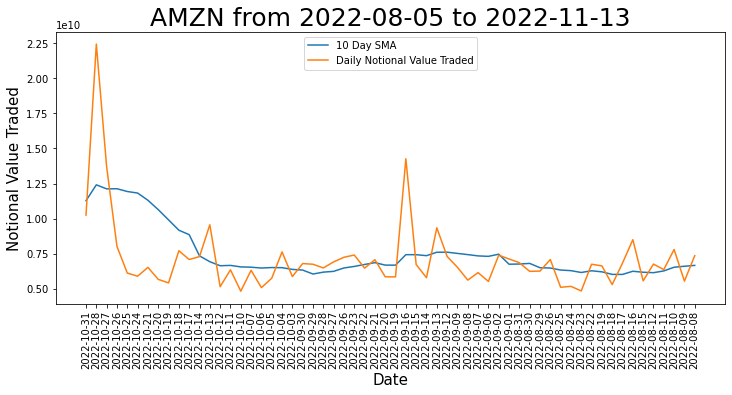

In [244]:
# plotting notional value traded and moving average
plt.figure(figsize=(12,5));
plt.plot(daily_not_val_traded_df['SMA10'], label='10 Day SMA');
plt.plot(daily_not_val_traded_df['daily_notional_value_traded'], label='Daily Notional Value Traded')
plt.title(symbol + ' from ' + (datetime.now() - timedelta(days=100)).strftime("%Y-%m-%d") + ' to ' + datetime.now().strftime("%Y-%m-%d"), fontsize=25);
plt.xlabel('Date', fontsize=15);
plt.xticks(rotation = 90)
plt.ylabel('Notional Value Traded', fontsize=15);
leg = plt.legend(loc='upper center')

# Normalizing Notional Value Traded for Each Day

In [245]:
# generate bars for each minute
d1 = timedelta(days=100)
d2 = timedelta(days=1)
start_date = (datetime.now() - d1).strftime("%Y-%m-%d")
end_date = (datetime.now() - d2).strftime("%Y-%m-%d")
trades = api.get_bars(symbol, TimeFrame.Minute, start_date, end_date, adjustment='all').df
trades['date'] = ""
for i in trades.index:
    trades.at[i, 'date'] = i.strftime("%Y-%m-%d")

In [246]:
# merge SMA and trade dataframes
trades = trades.merge(daily_not_val_traded_df, on='date')
trades = trades.set_index('date')

# calculate normalized notional value traded
trades['normalized_notional_value_traded'] = trades['volume'] * trades['vwap'] / trades['SMA10']
trades

,open,high,low,close,volume,trade_count,vwap,daily_notional_value_traded,SMA10,normalized_notional_value_traded
date,,,,,,,,,,
2022-08-08,141.0500,141.5800,140.71,141.58,2268,46,141.009224,7.362212e+09,6.667620e+09,0.000048
2022-08-08,141.1900,141.1900,141.16,141.16,947,20,141.205660,7.362212e+09,6.667620e+09,0.000020
2022-08-08,141.1700,141.1700,141.15,141.15,414,16,141.168001,7.362212e+09,6.667620e+09,0.000009
2022-08-08,141.3800,141.3800,141.38,141.38,883,53,141.380565,7.362212e+09,6.667620e+09,0.000019
2022-08-08,141.2100,141.2100,141.21,141.21,399,13,141.304859,7.362212e+09,6.667620e+09,0.000008
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,102.3700,102.4000,102.37,102.40,2465,24,102.386682,1.024798e+10,1.127866e+10,0.000022
2022-10-31,102.4000,102.4000,102.36,102.38,1191,27,102.389622,1.024798e+10,1.127866e+10,0.000011
2022-10-31,102.3601,102.3601,102.36,102.36,1995,34,102.361587,1.024798e+10,1.127866e+10,0.000018


# Filtering 99.9 Percentile of Large Trades

In [247]:
# sort dataframe by date into a dataframe list for each day
DFList = []
for group in trades.groupby(trades.index):
    DFList.append(group[1])

In [248]:
# calculating 99.9 percentile and filtering values that are in that percentile
filtered = []
for i in DFList:
    border = i['normalized_notional_value_traded'].quantile(0.999)
    filtered.append(i[i['normalized_notional_value_traded'] > border])

# EMA of Large Trades

Enter x-trade moving average for x (e.g. 1, 2, 5, etc): 10


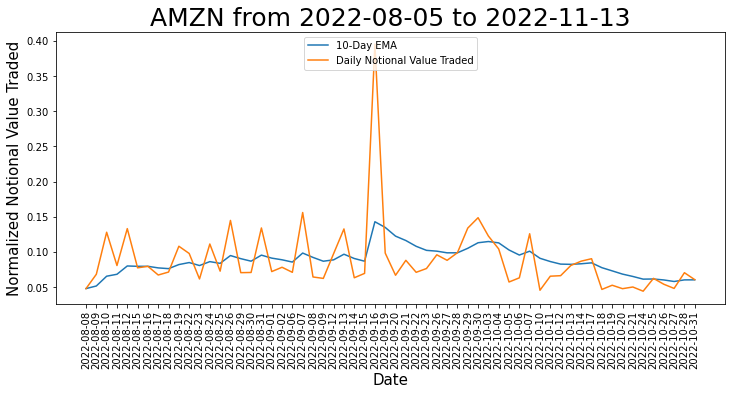

In [249]:
# creating exponential moving average for large trades
ewm = input ("Enter x-trade moving average for x (e.g. 1, 2, 5, etc): ")

filtered_df = pd.concat(filtered)
filtered_df['EMA'] = filtered_df['normalized_notional_value_traded'].ewm(span=int(ewm), adjust=False).mean()

# plotting notional value traded and exponential moving average
plt.figure(figsize=(12,5));
plt.plot(filtered_df['EMA'], label=ewm + '-Day EMA');
plt.plot(filtered_df['normalized_notional_value_traded'], label='Daily Notional Value Traded')
plt.title(symbol + ' from ' + (datetime.now() - timedelta(days=100)).strftime("%Y-%m-%d") + ' to ' + datetime.now().strftime("%Y-%m-%d"), fontsize=25);
plt.xlabel('Date', fontsize=15);
plt.xticks(rotation = 90)
plt.ylabel('Normalized Notional Value Traded', fontsize=15);
leg = plt.legend(loc='upper center')

# Tool for Input Data

In [252]:
# tool for filtering large trades in data
new = filtered_df.drop(['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap', 'daily_notional_value_traded', 'SMA10', 'normalized_notional_value_traded'], axis=1)
trades = trades.merge(new, on='date')
trades = trades[trades.normalized_notional_value_traded >= trades.EMA]
trades

,open,high,low,close,volume,trade_count,vwap,daily_notional_value_traded,SMA10,normalized_notional_value_traded,EMA_x,EMA_y,EMA
date,,,,,,,,,,,,,
2022-08-08,139.41,139.5500,139.41,139.48,2291342,130,139.410339,7.362212e+09,6.667620e+09,0.047909,0.047909,0.047909,0.047909
2022-08-09,137.83,137.8300,137.78,137.80,3271580,106,137.829963,5.545894e+09,6.606314e+09,0.068256,0.051608,0.051608,0.051608
2022-08-10,142.69,142.7300,142.58,142.58,5863556,112,142.689882,7.801141e+09,6.536476e+09,0.128000,0.065498,0.065498,0.065498
2022-08-11,140.67,140.7399,140.58,140.64,3599742,139,140.640026,6.367337e+09,6.273668e+09,0.080697,0.068261,0.068261,0.068261
2022-08-12,143.53,143.6200,143.42,143.55,5701802,215,143.549979,6.762295e+09,6.147858e+09,0.133135,0.080056,0.080056,0.080056
2022-08-19,138.23,138.2300,138.22,138.23,4855357,137,138.229997,6.633114e+09,6.208897e+09,0.108096,0.082040,0.082040,0.082040
2022-08-22,133.25,133.2500,133.20,133.20,4614687,171,133.219992,6.749146e+09,6.284582e+09,0.097822,0.084909,0.084909,0.084909
2022-08-24,133.80,133.8000,133.55,133.55,5233591,184,133.799675,5.173068e+09,6.292731e+09,0.111280,0.086235,0.086235,0.086235
2022-08-26,130.76,130.9325,130.70,130.75,7175973,224,130.750018,7.084858e+09,6.479772e+09,0.144798,0.094867,0.094867,0.094867
